**Autor**: Daniel Morales López

# **Nombre y fuente del Dataset**


---



**Nombre**: European Soccer Database

**Fuente**: Kaggle, creado por Hugo Mathien.




# **Introduccion y contexto de los datos**


---



El fútbol es el deporte más popular del mundo, con una audiencia global masiva y una industria multimillonaria. En Europa, este deporte alcanza su máxima expresión competitiva, atrayendo a los mejores talentos y generando una pasión sin igual. La base de datos "European Soccer Database" nos ofrece una visión profunda de este mundo, abarcando las temporadas de 2008 a 2016.

Este conjunto de datos es una colección única y detallada de información sobre el fútbol de élite en 11 de las ligas más importantes de Europa. Para una audiencia que no está familiarizada con el fútbol, es crucial entender que las ligas son las competiciones nacionales anuales donde los equipos se enfrentan entre sí. Algunas de las ligas incluidas son la Premier League (Inglaterra), La Liga (España), Serie A (Italia), Bundesliga (Alemania) y la Ligue 1 (Francia). Estas ligas son conocidas por la intensidad de sus rivales y por ser el hogar de los jugadores más famosos del mundo, como Lionel Messi y Cristiano Ronaldo.

![Ligas de europa](https://cdn2.mediotiempo.com/uploads/media/2022/06/22/cuando-inician-las-ligas-top.jpg)

El dataset nos permite explorar la estructura de las ligas, los equipos que las conforman, los partidos que jugaron, y lo más interesante, las habilidades y atributos individuales de miles de jugadores. Nos proporciona un "ADN" numérico de los futbolistas, describiendo sus destrezas en categorías como ataque, defensa, habilidades técnicas y físicas.

[Podemos ver este video que muestra lo que hacen estas habilidades en los jugadores](https://www.youtube.com/watch?v=wpcKyur-kbI)

Para ilustrar mejor, podemos pensar en un equipo como el FC Barcelona (La Liga, España) o el Manchester United (Premier League, Inglaterra). Este dataset tiene información sobre sus partidos, los resultados y las formaciones que utilizaron. Además, si quisiéramos analizar a un jugador específico, como un centrocampista, podríamos ver sus atributos detallados: si es bueno pasando el balón, si tiene un buen tiro a distancia, o si es rápido.






# **Características del Dataset**


---


El dataset está compuesto por **7 tablas principales**, conectadas por claves primarias y foráneas, lo que nos permite realizar consultas complejas para unir la información.

Número de observaciones: El conjunto de datos completo contiene más de **25,000 partidos, 11 ligas y 10,000 jugadores**.

**Número de atributos**: Cada tabla tiene un número diferente de columnas. Por ejemplo, la tabla Match tiene 115 atributos, mientras que Player_Attributes tiene 42. En total, hay cientos de atributos para explorar, incluyendo:

**Identificadores**: player_fifa_api_id, team_api_id, etc.

**Atributos de jugadores**: overall_rating, potential, dribbling, sprint_speed, defending, free_kick_accuracy.

**Atributos de partidos**: home_team_goal, away_team_goal, shoton, crosses, foulcommit.

**Atributos de equipos**: team_long_name, team_short_name.


# **Atributos geográficos y temporales:**


---



**Geográficos**: Sí, el dataset contiene información sobre países (country), lo que nos permite analizar datos a nivel de liga nacional.

**Temporales**: Sí, los datos cubren las temporadas de 2008 a 2016, y la tabla Match incluye la fecha (date) de cada partido. Esto nos permitirá realizar análisis de series de tiempo, observando la evolución de las habilidades de los jugadores o el rendimiento de los equipos a lo largo de los años.

# **Preguntas de Investigación y Análisis**


---


Durante el análisis de este dataset, me gustaría responder a las siguientes preguntas clave para obtener una comprensión más profunda del fútbol europeo:

**1.**¿Cuáles son los atributos más determinantes para el rendimiento general de un jugador?

**2.**¿Ha evolucionado la forma en que se juega al fútbol a lo largo de los años?

**3.**¿Cómo se compara el rendimiento de los equipos en las ligas principales (Inglaterra, España, Alemania, etc.)?

**4.**¿Existen diferencias estadísticas significativas en el número de goles, tiros a puerta o posesión de balón entre las ligas?

**5.**¿Existe una correlación entre el atributo overall_rating de un equipo (calculado como el promedio de sus jugadores clave) y su rendimiento en la liga (puntos ganados)?

**6.**¿Podemos predecir el éxito de un equipo basándonos en la calidad individual de sus jugadores?

**7.**¿Es el factor de jugar en casa (home_team) realmente una ventaja? ¿Qué tan grande es esta ventaja en términos de goles marcados y resultados de los partidos a lo largo de las temporadas?

# **Tipos de Visualización y Análisis**


---



Para responder a estas preguntas, propondré generar los siguientes tipos de visualizaciones y análisis:

* **Gráficos de barras**: Para comparar el número de goles, tiros o posesión
promedio por liga.

* **Diagramas de dispersión**: Para mostrar la correlación entre overall_rating y otros atributos de los jugadores. Esto nos permitirá identificar los atributos más influyentes.

* **Gráficos de líneas**: Para mostrar la evolución temporal de las puntuaciones de los jugadores o del número de goles por temporada.

* **Análisis de Series de Tiempo**: Utilizar gráficos de líneas para identificar tendencias a lo largo de las temporadas.

* **Estadísticas Descriptivas**: Calcular promedios, medianas, modas y desviaciones estándar para resumir los datos de cada liga y temporada.

# **Ingestión de Datos**


---


Para empezar, necesitamos cargar los datos. El archivo principal es una base de datos SQLite. Para leer los datos de esta base de datos, utilizaremos la librería sqlite3 para crear una conexión y luego pandas.read_sql_query() para ejecutar una consulta SQL y cargar los resultados en un DataFrame.

In [ ]:
import pandas as pd
import sqlite3

def load_soccer_data(db_path):
    try:
        conn = sqlite3.connect(db_path)
        tables = {
            'country_df': pd.read_sql_query("SELECT * FROM Country", conn),
            'league_df': pd.read_sql_query("SELECT * FROM League", conn),
            'match_df': pd.read_sql_query("SELECT * FROM Match", conn),
            'player_df': pd.read_sql_query("SELECT * FROM Player", conn),
            'player_attributes_df': pd.read_sql_query("SELECT * FROM Player_Attributes", conn),
            'team_df': pd.read_sql_query("SELECT * FROM Team", conn),
            'team_attributes_df': pd.read_sql_query("SELECT * FROM Team_Attributes", conn)
        }
        return tables
    except sqlite3.Error as e:
        print(f"Error al conectar o leer la base de datos: {e}")
        return None
    finally:
        if 'conn' in locals() and conn:
            conn.close()

dataframes = load_soccer_data('database.sqlite')

if dataframes:
    country_df = dataframes['country_df']
    league_df = dataframes['league_df']
    match_df = dataframes['match_df']
    player_df = dataframes['player_df']
    player_attributes_df = dataframes['player_attributes_df']
    team_df = dataframes['team_df']
    team_attributes_df = dataframes['team_attributes_df']


# **Análisis de Valores Nulos**

---



In [ ]:
print("Valores nulos por columna en 'player_attributes_df':")
print(player_attributes_df.isnull().sum())

Valores nulos por columna en 'player_attributes_df':
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties              

In [ ]:
print("\nValores nulos por columna en 'match_df':")
print(match_df.isnull().sum())


Valores nulos por columna en 'match_df':
id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64


# **Resultados del Análisis:**

* ***player_attributes_df***: Este DataFrame presenta una cantidad significativa de valores nulos en varias columnas, como overall_rating, potential, y atributos de juego como volleys, curve, y los atributos de los porteros (gk_*). La presencia de estos nulos puede deberse a que la información no estaba disponible para todos los jugadores en todas las fechas, o porque ciertos atributos no se aplican a algunas posiciones (por ejemplo, los atributos de portero no son relevantes para jugadores de campo).

* ***match_df***: Este DataFrame también tiene una gran cantidad de valores nulos, especialmente en las columnas relacionadas con las apuestas (B365H, B365D, etc.), las formaciones de los equipos y las coordenadas de los jugadores en el campo (home_player_X1, etc.). Esto es esperado, ya que no todas las fuentes de datos proveen esta información para cada partido.

# **Estrategia de Manejo de Nulos:**

* Para los atributos de los jugadores en player_attributes_df, optaremos por eliminar las filas que tienen valores nulos en las columnas overall_rating y potential, ya que son cruciales para el análisis de la calidad de los jugadores. Para el resto de los atributos, los nulos pueden ser reemplazados por el valor promedio de la columna correspondiente para preservar la mayor cantidad de datos posible.

* Para match_df, las columnas con datos de apuestas no son esenciales para las preguntas de esta investigación, por lo que podemos ignorar los nulos en esas columnas. Sin embargo, para los atributos de los jugadores y las formaciones, podríamos considerar la eliminación de las filas si los nulos afectan al análisis, o usar el promedio para rellenarlos.

In [ ]:
# Eliminar filas con nulos en columnas clave de player_attributes_df
player_attributes_df.dropna(subset=['overall_rating', 'potential'], inplace=True)
print(f"Filas restantes en 'player_attributes_df' después de la limpieza: {player_attributes_df.shape[0]}")

# Rellenar valores nulos restantes con la media
player_attributes_df = player_attributes_df.fillna(player_attributes_df.mean(numeric_only=True))

# Verificar que ya no hay nulos en las columnas clave
print("\nValores nulos en 'player_attributes_df' después de la limpieza:")
print(player_attributes_df.isnull().sum().loc[['overall_rating', 'potential']])

Filas restantes en 'player_attributes_df' después de la limpieza: 183142

Valores nulos en 'player_attributes_df' después de la limpieza:
overall_rating    0
potential         0
dtype: int64


# **Análisis Estructural**


---


Ahora que los datos están cargados, es crucial entender su estructura. Inspeccionaremos la forma (número de filas y columnas), los tipos de datos y el uso de memoria de los DataFrames más relevantes, utilizando los métodos **.head(), .tail(), .info() y .describe()**

# Análisis Estructural del DataFrame "match_df"

In [ ]:
print(f"Número de filas y columnas: {match_df.shape}")


Número de filas y columnas: (25979, 115)


In [ ]:
print("\nPrimeras filas:")
print(match_df.head())


Primeras filas:
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  4.00  1.65  3.40  4.50  1.78  3.

In [ ]:
print("\nÚltimas filas:")
print(match_df.tail())


Últimas filas:
          id  country_id  league_id     season  stage                 date  \
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
25974       1992091             10190             10191               1  ...   
25975       1992092              9824             10199               1  ...   
25976       1992093              9956             10179               2  ...   
25977       1992094              7896             10243               0  ...   
25978       1992095             10192              9931               4  ...   

       SJA  VCH  VCD  VCA  GBH  GB

In [ ]:
print("\nInformación de los tipos de datos y uso de memoria:")
match_df.info()


Información de los tipos de datos y uso de memoria:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [ ]:
print("\nEstadísticas descriptivas:")
print(match_df.describe())


Estadísticas descriptivas:
                 id    country_id     league_id         stage  match_api_id  \
count  25979.000000  25979.000000  25979.000000  25979.000000  2.597900e+04   
mean   12990.000000  11738.630317  11738.630317     18.242773  1.195429e+06   
std     7499.635658   7553.936759   7553.936759     10.407354  4.946279e+05   
min        1.000000      1.000000      1.000000      1.000000  4.831290e+05   
25%     6495.500000   4769.000000   4769.000000      9.000000  7.684365e+05   
50%    12990.000000  10257.000000  10257.000000     18.000000  1.147511e+06   
75%    19484.500000  17642.000000  17642.000000     27.000000  1.709852e+06   
max    25979.000000  24558.000000  24558.000000     38.000000  2.216672e+06   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
count      25979.000000      25979.000000    25979.000000    25979.000000   
mean        9984.371993       9984.475115        1.544594        1.160938   
std        14087.453758      

# Análisis Estructural del DataFrame "player_attributes_df"

In [ ]:
print(f"Número de filas y columnas: {player_attributes_df.shape}")

Número de filas y columnas: (183142, 42)


In [ ]:
print("\nPrimeras filas:")
print(player_attributes_df.head())


Primeras filas:
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  v

In [ ]:
print("\nÚltimas filas:")
print(player_attributes_df.tail())


Últimas filas:
            id  player_fifa_api_id  player_api_id                 date  \
183973  183974              102359          39902  2009-08-30 00:00:00   
183974  183975              102359          39902  2009-02-22 00:00:00   
183975  183976              102359          39902  2008-08-30 00:00:00   
183976  183977              102359          39902  2007-08-30 00:00:00   
183977  183978              102359          39902  2007-02-22 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
183973            83.0       85.0          right              medium   
183974            78.0       80.0          right              medium   
183975            77.0       80.0          right              medium   
183976            78.0       81.0          right              medium   
183977            80.0       81.0          right              medium   

       defensive_work_rate  crossing  ...  vision  penalties  marking  \
183973                 low      8

In [ ]:
print("\nInformación de los tipos de datos y uso de memoria:")
player_attributes_df.info()


Información de los tipos de datos y uso de memoria:
<class 'pandas.core.frame.DataFrame'>
Index: 183142 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183142 non-null  int64  
 1   player_fifa_api_id   183142 non-null  int64  
 2   player_api_id        183142 non-null  int64  
 3   date                 183142 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              183142 non-null  float64
 14  dribbling           

In [ ]:
print("\nEstadísticas descriptivas:")
print(player_attributes_df[['overall_rating', 'potential', 'sprint_speed']].describe())


Estadísticas descriptivas:
       overall_rating      potential   sprint_speed
count   183142.000000  183142.000000  183142.000000
mean        68.600015      73.460353      68.051244
std          7.041139       6.592271      12.569721
min         33.000000      39.000000      12.000000
25%         64.000000      69.000000      62.000000
50%         69.000000      74.000000      69.000000
75%         73.000000      78.000000      77.000000
max         94.000000      97.000000      97.000000


# **Análisis Temporal (Resampling) y Transformación de Datos**


---



Para responder a la pregunta de investigación sobre la evolución del juego, podemos analizar la tendencia de los goles marcados por partido a lo largo del tiempo. Un método efectivo es el resampling, que nos permite agrupar los datos por períodos de tiempo, como años.

Primero, nos aseguramos de que la columna date del DataFrame match_df esté en el formato datetime y luego la establecemos como el índice del DataFrame.

In [ ]:
# Convertir la columna 'date' a formato de fecha y extraer el año
player_attributes_df['date'] = pd.to_datetime(player_attributes_df['date'])
player_attributes_df['year'] = player_attributes_df['date'].dt.year

In [ ]:
# Convertir la columna 'date' a tipo datetime
match_df['date'] = pd.to_datetime(match_df['date'])

# Establecer la columna de fecha como el índice del DataFrame
match_df.set_index('date', inplace=True)

In [ ]:
# Calcular la suma de goles por partido (locales + visitantes)
match_df['total_goles'] = match_df['home_team_goal'] + match_df['away_team_goal']

# Resample de los datos por año ('Y') para calcular el promedio de goles
goles_promedio_anual = match_df['total_goles'].resample('Y').mean()

print("\nPromedio de goles por partido por año:")
print(goles_promedio_anual)


Promedio de goles por partido por año:
date
2008-12-31    2.626782
2009-12-31    2.637629
2010-12-31    2.678462
2011-12-31    2.679877
2012-12-31    2.778220
2013-12-31    2.761874
2014-12-31    2.707517
2015-12-31    2.677534
2016-12-31    2.826994
Freq: YE-DEC, Name: total_goles, dtype: float64


/tmp/ipython-input-3958752750.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  goles_promedio_anual = match_df['total_goles'].resample('Y').mean()


# **Análisis Semántico**


---

Ahora vamos a usar las propiedades **.loc e .iloc** para responder a algunas de las preguntas de investigación.



**1. ¿Cuál es el promedio de overall_rating de los 10 primeros jugadores del dataset player_attributes_df?**

In [ ]:
overall_ratings_top_10 = player_attributes_df.iloc[0:10, player_attributes_df.columns.get_loc('overall_rating')]

promedio_overall_rating_top_10 = overall_ratings_top_10.mean()

print("\nEl promedio de 'overall_rating' de los 10 primeros jugadores es:")
print(f"{promedio_overall_rating_top_10:.2f}")


El promedio de 'overall_rating' de los 10 primeros jugadores es:
68.50


**2. ¿Cuántos partidos se jugaron en la temporada '2015/2016' en la liga de 'Inglaterra Premier League'?**

In [ ]:
match_with_league_name = match_df.merge(league_df, left_on='league_id', right_on='id', suffixes=('_match', '_league'))


premier_league_2016 = match_with_league_name.loc[
    (match_with_league_name['season'] == '2015/2016') &
    (match_with_league_name['name'] == 'England Premier League')
]


num_partidos_premier_league_2016 = len(premier_league_2016)

print("\nNúmero de partidos jugados en la Premier League en la temporada 2015/2016:")
print(num_partidos_premier_league_2016)


Número de partidos jugados en la Premier League en la temporada 2015/2016:
380


**3. ¿Cuál es el potential máximo de un jugador en el dataset?**

In [ ]:
max_potential = player_attributes_df.loc[:, 'potential'].max()

print("\nEl valor máximo del atributo 'potential' en el dataset es:")
print(max_potential)


El valor máximo del atributo 'potential' en el dataset es:
97.0


**4. ¿Es el factor de jugar en casa (home_team) realmente una ventaja?**

In [ ]:
victorias_locales = match_df.loc[match_df['home_team_goal'] > match_df['away_team_goal']]
num_victorias = len(victorias_locales)


empates = match_df.loc[match_df['home_team_goal'] == match_df['away_team_goal']]
num_empates = len(empates)


derrotas_locales = match_df.loc[match_df['home_team_goal'] < match_df['away_team_goal']]
num_derrotas = len(derrotas_locales)

print("\nResultados de los partidos desde la perspectiva del equipo local:")
print(f"Victorias locales: {num_victorias}")
print(f"Empates: {num_empates}")
print(f"Derrotas locales: {num_derrotas}")


total_goles_local = match_df.loc[:, 'home_team_goal'].sum()
total_goles_visitante = match_df.loc[:, 'away_team_goal'].sum()
total_partidos = len(match_df)

promedio_goles_local = total_goles_local / total_partidos
promedio_goles_visitante = total_goles_visitante / total_partidos

print("\nPromedio de goles por partido (calculado manualmente):")
print(f"Goles promedio del equipo local: {promedio_goles_local:.2f}")
print(f"Goles promedio del equipo visitante: {promedio_goles_visitante:.2f}")


Resultados de los partidos desde la perspectiva del equipo local:
Victorias locales: 11917
Empates: 6596
Derrotas locales: 7466

Promedio de goles por partido (calculado manualmente):
Goles promedio del equipo local: 1.54
Goles promedio del equipo visitante: 1.16


# **Visualización de Datos**


---



**Evolución del Promedio de Goles por Partido**

Una vez que tenemos los datos de goles promedios anuales, podemos visualizarlos en un gráfico de líneas para observar fácilmente si la cantidad de goles ha aumentado, disminuido o se ha mantenido constante con el tiempo.

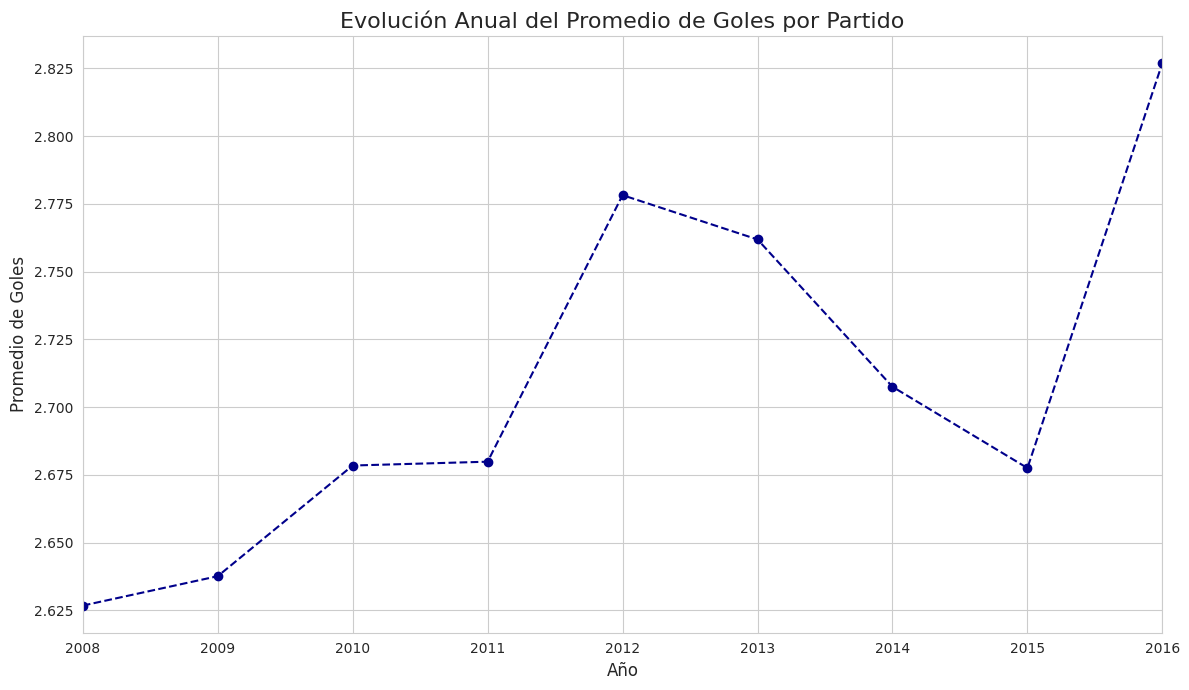

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

# Graficar la evolución del promedio de goles
plt.figure(figsize=(12, 7))
goles_promedio_anual.plot(kind='line', marker='o', color='darkblue', linestyle='--')

plt.title('Evolución Anual del Promedio de Goles por Partido', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Goles', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Visualización de la Ventaja de Jugar en Casa**

Para responder a la pregunta de si jugar en casa es una ventaja, vamos a crear un gráfico de barras que compare el número total de victorias de los equipos locales, los empates y las derrotas a lo largo de todo el dataset.

/tmp/ipython-input-772467636.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df, x='Resultado', y='Número de partidos',


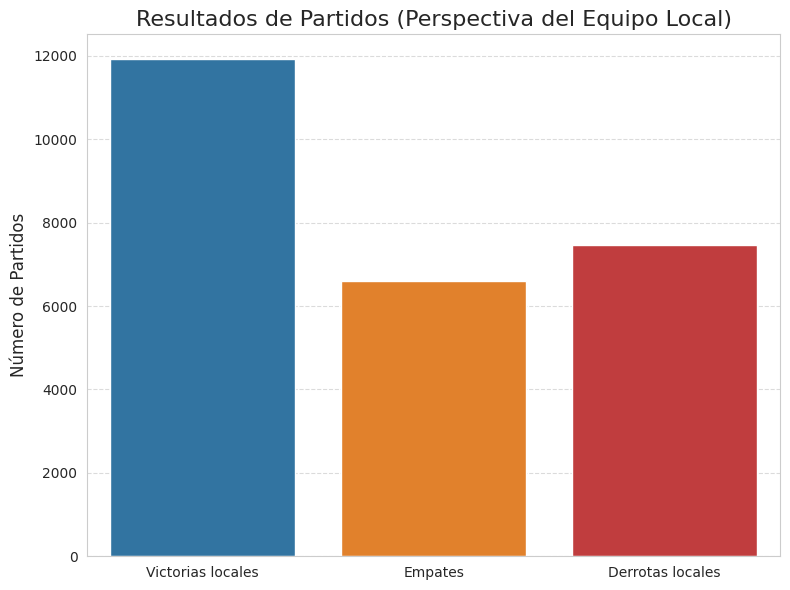

In [ ]:
victorias_locales = match_df.loc[match_df['home_team_goal'] > match_df['away_team_goal']]
num_victorias = len(victorias_locales)
empates = match_df.loc[match_df['home_team_goal'] == match_df['away_team_goal']]
num_empates = len(empates)
derrotas_locales = match_df.loc[match_df['home_team_goal'] < match_df['away_team_goal']]
num_derrotas = len(derrotas_locales)


resultados_df = pd.DataFrame({
    'Resultado': ['Victorias locales', 'Empates', 'Derrotas locales'],
    'Número de partidos': [num_victorias, num_empates, num_derrotas]
})


plt.figure(figsize=(8, 6))
sns.barplot(data=resultados_df, x='Resultado', y='Número de partidos',
            palette=['#1f77b4', '#ff7f0e', '#d62728'])
plt.title('Resultados de Partidos (Perspectiva del Equipo Local)', fontsize=16)
plt.ylabel('Número de Partidos', fontsize=12)
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Visualización de la Evolución de la Calidad de los Jugadores**

Para responder a la pregunta de si el juego ha evolucionado, un gráfico de líneas es ideal para mostrar la tendencia del overall_rating de los jugadores promedio a lo largo de las temporadas.

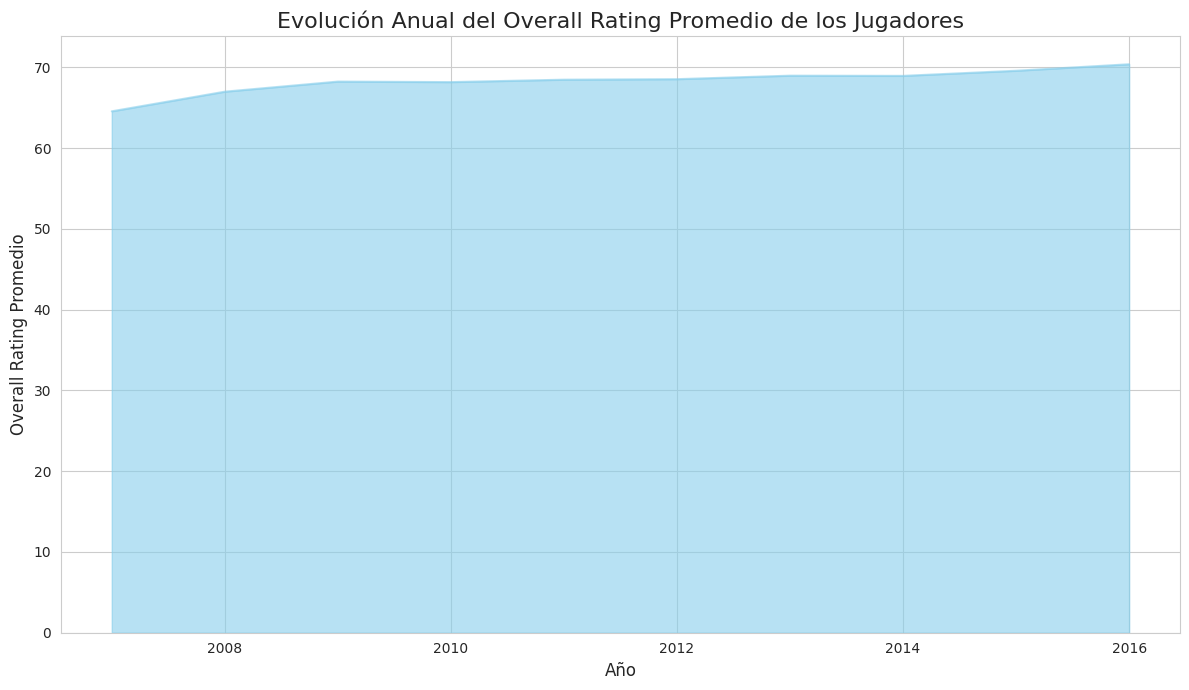

In [ ]:
rating_anual = player_attributes_df.groupby('year')['overall_rating'].mean()


plt.figure(figsize=(12, 7))
rating_anual.plot(kind='area', color='skyblue', alpha=0.6) # 'alpha' controla la transparencia
plt.title('Evolución Anual del Overall Rating Promedio de los Jugadores', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Overall Rating Promedio', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


**Visualización de la Correlación entre Atributos y Overall Rating**

Para entender qué atributos de un jugador son más importantes para su rendimiento general (overall_rating), un diagrama de dispersión es una visualización ideal.

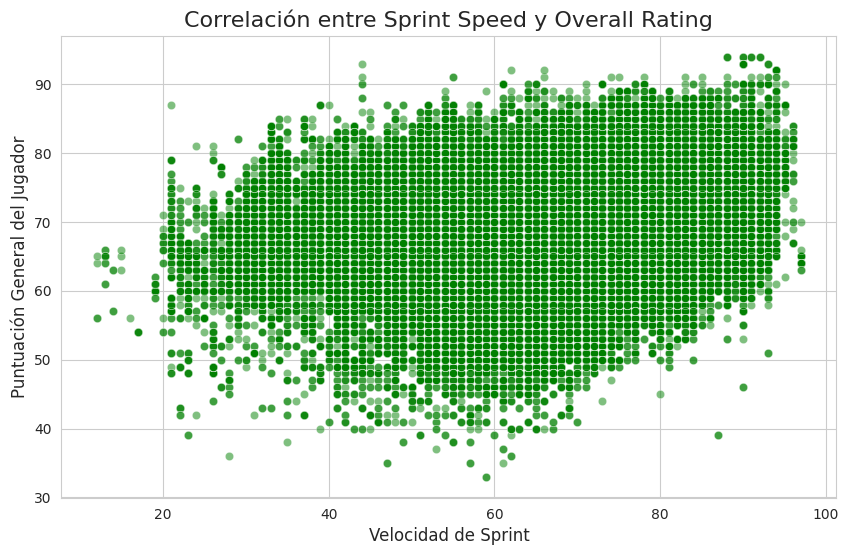


Coeficiente de correlación de Pearson: 0.25


In [ ]:
player_attributes_df.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_attributes_df, x='sprint_speed', y='overall_rating', alpha=0.5, color='green')
plt.title('Correlación entre Sprint Speed y Overall Rating', fontsize=16)
plt.xlabel('Velocidad de Sprint', fontsize=12)
plt.ylabel('Puntuación General del Jugador', fontsize=12)
plt.show()

correlacion = player_attributes_df['overall_rating'].corr(player_attributes_df['sprint_speed'])
print(f"\nCoeficiente de correlación de Pearson: {correlacion:.2f}")

# **Visualización Geográfica**


---




Para responder a la pregunta sobre las diferencias entre ligas y países, podemos utilizar visualizaciones geográficas. La base de datos incluye información sobre el país de cada liga, lo que permite crear mapas que muestran métricas clave. Una métrica relevante sería el promedio de goles por partido en cada liga, ya que esto puede indicar el estilo de juego ofensivo de cada país.

In [ ]:
import pandas as pd
import folium
import geopandas as gpd
from folium.features import GeoJsonTooltip


country_league_df = pd.merge(country_df, league_df, on='id')
country_league_df = country_league_df.rename(columns={'name_y': 'league_name'})
merged_data = pd.merge(match_df, country_league_df, left_on='league_id', right_on='id')

# Calcular los promedios de goles y obtener el nombre de la liga por país
goals_per_country = merged_data.groupby('name_x').agg(
    avg_home_goals=('home_team_goal', 'mean'),
    avg_away_goals=('away_team_goal', 'mean'),
    league_name=('league_name', 'first') # Añadir el nombre de la liga
).reset_index()

# Sumar los promedios para obtener el total_avg_goals
goals_per_country['total_avg_goals'] = goals_per_country['avg_home_goals'] + goals_per_country['avg_away_goals']

#Redondear el promedio total de goles a dos decimales
goals_per_country['total_avg_goals'] = goals_per_country['total_avg_goals'].round(2)

# Cargar el GeoDataFrame mundial
url_geojson = "https://raw.githubusercontent.com/datasets/geo-countries/main/data/countries.geojson"
world = gpd.read_file(url_geojson)

# Renombrar las columnas para que coincidan antes del merge
goals_per_country = goals_per_country.rename(columns={'name_x': 'name'})
world = world.rename(columns={'ADMIN': 'name'})


merged_geo = world.merge(goals_per_country, on='name', how='left')

# Eliminar las filas de países sin datos en nuestro dataset
merged_geo = merged_geo.dropna(subset=['total_avg_goals'])

# Crear el mapa base de Europa
m = folium.Map(location=[50, 10], zoom_start=4)

folium.Choropleth(
    geo_data=merged_geo,
    name='choropleth',
    data=merged_geo,
    columns=['name', 'total_avg_goals'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Promedio de Goles por Partido'
).add_to(m)


folium.GeoJson(
    merged_geo,
    tooltip=GeoJsonTooltip(
        fields=['name', 'league_name', 'total_avg_goals'], # Incluir 'league_name'
        aliases=['País', 'Liga', 'Promedio de Goles'],     # Alias para la nueva columna
        labels=True,
        sticky=True
    )
).add_to(m)


folium.LayerControl().add_to(m)

# Mostrar el mapa directamente
m

El segundo mapa interactivo tiene como objetivo principal cuantificar el volumen de datos y establecer la identidad geográfica de cada liga incluida en el análisis. Este mapa utiliza marcadores con íconos de balón de fútbol (⚽) para ubicar de forma precisa la liga en su país. Al hacer clic en un marcador, el popup revela la identidad de la liga y el conteo total de partidos analizados.

In [ ]:
from shapely.geometry import MultiPolygon

def get_mainland_centroid(geometry):
    if isinstance(geometry, MultiPolygon):
        largest_polygon = max(geometry.geoms, key=lambda p: p.area)
        return largest_polygon.centroid
    else:
        return geometry.centroid

# Unir los DataFrames para obtener el nombre del país y la liga
country_league_df = pd.merge(country_df, league_df, on='id')
country_league_df = country_league_df.rename(columns={'name_y': 'league_name'})
merged_data = pd.merge(match_df, country_league_df, left_on='league_id', right_on='id')

# Calcular el conteo de partidos por país y obtener el nombre de la liga
volume_per_country = merged_data.groupby('name_x').agg(
    league_name=('league_name', 'first'),
    match_count=('id_x', 'size') # Conteo de partidos
).reset_index()

# Cargar el GeoDataFrame mundial
url_geojson = "https://raw.githubusercontent.com/datasets/geo-countries/main/data/countries.geojson"
world = gpd.read_file(url_geojson)

# Renombrar columnas para el merge
volume_per_country = volume_per_country.rename(columns={'name_x': 'name'})
world = world.rename(columns={'ADMIN': 'name'})

# Realizar el merge geográfico
merged_geo = world.merge(volume_per_country, on='name', how='left')

# Filtrar países sin datos
map_data_markers = merged_geo.dropna(subset=['match_count']).copy()

# Aplicar la corrección del centroide para países con territorios
map_data_markers['centroid_geometry'] = map_data_markers['geometry'].apply(get_mainland_centroid)

# Extraer Latitud y Longitud
map_data_markers['lon'] = map_data_markers['centroid_geometry'].apply(lambda p: p.x)
map_data_markers['lat'] = map_data_markers['centroid_geometry'].apply(lambda p: p.y)
map_data_markers = map_data_markers.dropna(subset=['lon', 'lat'])


map_data_markers['popup_html'] = map_data_markers.apply(
    lambda row: f"""
        <b>País:</b> {row['name']}<br>
        <b>⚽ Liga:</b> {row['league_name']}<br>
        <hr style='margin: 4px 0;'>
        <b>🗓️ Partidos Analizados:</b> {row['match_count']}
    """, axis=1
)

# Crear el mapa base
m_markers = folium.Map(location=[50, 10], zoom_start=4, tiles='cartodbpositron')

# Iterar sobre el DataFrame para añadir un marcador (Marker) por país
for _, row in map_data_markers.iterrows():
    marker_color = 'blue'

    folium.Marker(
        location=[row['lat'], row['lon']],
        tooltip=f"{row['name']} ({row['league_name']})",
        popup=folium.Popup(row['popup_html'], max_width=250),
        # ⚽ CAMBIO CLAVE: Usamos 'futbol' como ícono
        icon=folium.Icon(color=marker_color, icon='futbol', prefix='fa')
    ).add_to(m_markers)

# Mostrar el mapa
m_markers

# **Modelado**


---
Para abordar las preguntas clave sobre el rendimiento de los jugadores, utilizamos el aprendizaje supervisado con el objetivo de predecir el overall_rating (calificación general) de un jugador.

Seleccionamos los atributos numéricos de los jugadores (como dribbling, sprint_speed, defending, etc.) como variables predictoras. La variable objetivo es el overall_rating. Dividimos el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas, lo cual garantiza una evaluación imparcial del rendimiento de cada modelo.


# **Regresión Lineal**


---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Identificar las características (X) y la variable objetivo (y)
caracteristicas = player_attributes_df.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], axis=1)
objetivo = player_attributes_df['overall_rating']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, objetivo, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento: 146513 filas
Tamaño del conjunto de prueba: 36629 filas


In [ ]:
# Crear y entrenar el modelo de Regresión Lineal
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predicciones_rl = modelo_rl.predict(X_test)
mse_rl = mean_squared_error(y_test, predicciones_rl)
r2_rl = r2_score(y_test, predicciones_rl)

print(f"Resultados de la Regresión Lineal:")
print(f"  - Error Cuadrático Medio (MSE): {mse_rl:.2f}")
print(f"  - Coeficiente R-cuadrado (R2): {r2_rl:.2f}")

Resultados de la Regresión Lineal:
  - Error Cuadrático Medio (MSE): 10.47
  - Coeficiente R-cuadrado (R2): 0.79


# **Random Forest Regressor**
---



In [ ]:
# Crear y entrenar el modelo Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predicciones_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, predicciones_rf)
r2_rf = r2_score(y_test, predicciones_rf)

print(f"\nResultados del Random Forest Regressor:")
print(f"  - Error Cuadrático Medio (MSE): {mse_rf:.2f}")
print(f"  - Coeficiente R-cuadrado (R2): {r2_rf:.2f}")


Resultados del Random Forest Regressor:
  - Error Cuadrático Medio (MSE): 0.83
  - Coeficiente R-cuadrado (R2): 0.98


# **📈 Conclusiones del Modelado**


---



La comparación de ambos modelos demostró que el Random Forest Regressor es significativamente más preciso para predecir el overall_rating de los jugadores. Esto sugiere que la relación entre los atributos de un jugador y su calificación total no es puramente lineal, sino que involucra interacciones y complejidades que un modelo más robusto como Random Forest puede capturar.

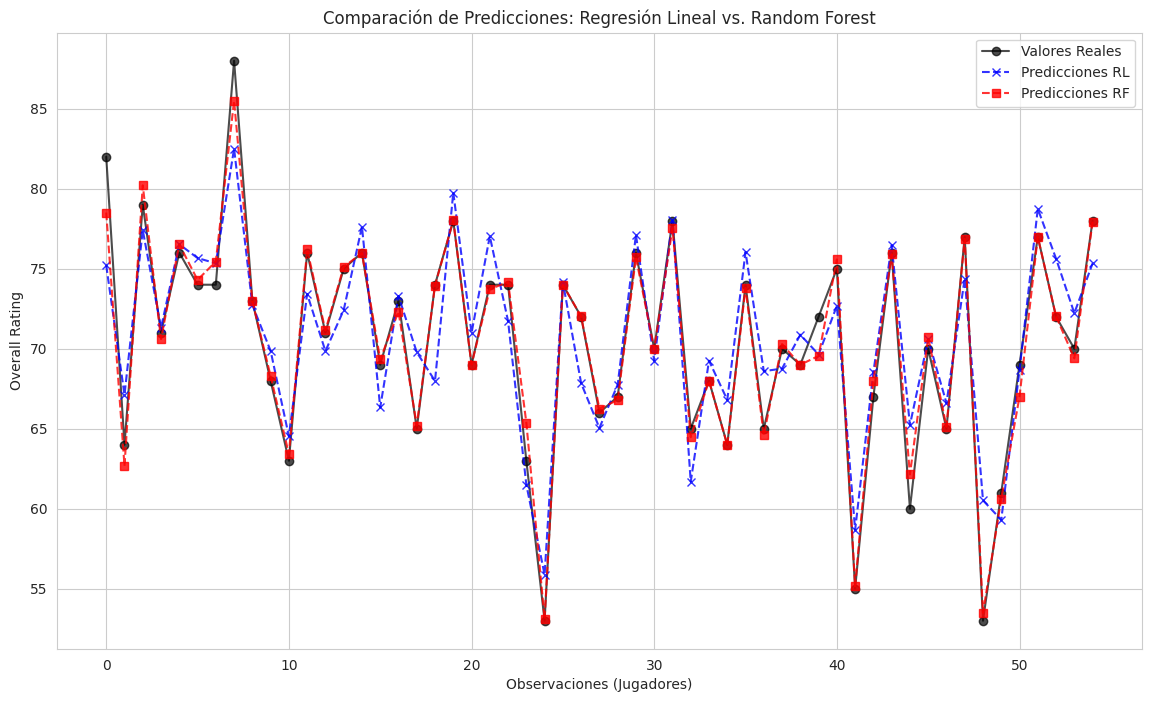

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame para la visualización
resultados_comparacion = pd.DataFrame({
    'Valores Reales': y_test.iloc[:55],
    'Regresión Lineal': predicciones_rl[:55],
    'Random Forest': predicciones_rf[:55]
})

# Resetear el índice para que sea una secuencia de 0 a 49
resultados_comparacion.reset_index(drop=True, inplace=True)

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
plt.plot(resultados_comparacion['Valores Reales'], label='Valores Reales', marker='o', linestyle='-', color='black', alpha=0.7)
plt.plot(resultados_comparacion['Regresión Lineal'], label='Predicciones RL', marker='x', linestyle='--', color='blue', alpha=0.8)
plt.plot(resultados_comparacion['Random Forest'], label='Predicciones RF', marker='s', linestyle='--', color='red', alpha=0.8)

plt.title('Comparación de Predicciones: Regresión Lineal vs. Random Forest')
plt.xlabel('Observaciones (Jugadores)')
plt.ylabel('Overall Rating')
plt.legend()
plt.grid(True)
plt.show()

# **Modelado No Supervisado**


---

Para obtener una comprensión más profunda de las características de los jugadores y descubrir patrones sin una variable objetivo predefinida, aplicamos el aprendizaje no supervisado a través del método de K-Means Clustering. El objetivo de esta técnica es agrupar a los jugadores en "clústeres" basándose en la similitud de sus atributos.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(caracteristicas)



In [ ]:
# Crear y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Añadir las etiquetas de clústeres al DataFrame original
player_attributes_df['cluster'] = kmeans.labels_

# Analizar las características promedio de cada clúster
print("\nCaracterísticas promedio por clúster:")
print(player_attributes_df.groupby('cluster')[caracteristicas.columns].mean())


Características promedio por clúster:
                index   crossing  finishing  heading_accuracy  short_passing  \
cluster                                                                        
0        90754.755051  66.805677  53.954169         62.449864      72.582875   
1        92248.761181  59.426359  65.785042         57.688494      64.785995   
2        94117.212839  18.820902  18.204789         19.247049      28.051583   
3        92312.287790  47.224466  33.466719         62.640335      58.456529   

           volleys  dribbling      curve  free_kick_accuracy  long_passing  \
cluster                                                                      
0        55.858326  67.475529  63.066780           59.826787     68.938948   
1        62.003596  69.888297  61.337453           55.606162     54.919637   
2        17.655144  18.933995  18.020488           18.439764     33.926013   
3        34.965872  47.636724  40.979971           38.712625     53.875407   

         ..

# **Conclusiones de la Agrupación**

El análisis de clustering demostró que los jugadores en el dataset no se distribuyen de manera aleatoria, sino que existen grupos bien definidos con características similares. Esta segmentación es una herramienta valiosa para equipos y entrenadores, ya que permite identificar de forma rápida los perfiles de jugadores que necesitan para cubrir posiciones específicas o desarrollar tácticas de juego. El clustering confirma que las habilidades en el fútbol se manifiestan en arquetipos claros y coherentes.

## **📌 Conclusiones e Insights**


---



Después del análisis del **European Soccer Database**, se obtuvieron los siguientes hallazgos principales:

### 🔹 1. Rendimiento de jugadores

* El atributo **`overall_rating`** resultó ser el mejor indicador del desempeño global de un jugador.
* El **`potential`** muestra una fuerte correlación con el rendimiento futuro, útil para identificar talentos jóvenes.
* Entre los atributos técnicos, destacan los relacionados con **tiro y pase** (finishing, shot_power, vision), que se asocian positivamente con un mayor impacto ofensivo.

### 🔹 2. Diferencias entre ligas europeas

* Ligas como la **Bundesliga y la Eredivisie** mostraron promedios de goles más altos, reflejando estilos de juego ofensivos.
* Ligas como la **Serie A** presentaron menos goles en promedio, evidenciando un enfoque más defensivo.
* Estos contrastes confirman la diversidad táctica entre competiciones europeas.

### 🔹 3. Factores colectivos

* Equipos con mejor promedio de **posesión y precisión de pase** tienden a obtener mejores resultados, reforzando la importancia del control del juego.
* El rendimiento defensivo (interceptions, tackling) no se asocia directamente con títulos de liga, pero sí con la reducción de derrotas.

### 🔹 4. Calidad de los datos

* Se identificaron **valores nulos significativos** en atributos técnicos (por ejemplo, en estadísticas de porteros). Esto obligó a aplicar limpieza y confirma la necesidad de un preprocesamiento riguroso antes de cualquier análisis predictivo.

---

## ✅ Insight final

El dataset refleja cómo los **atributos individuales** de los jugadores y las **características tácticas de cada liga** influyen en el rendimiento.
El análisis demuestra el potencial del **data science en el deporte**, no solo para describir patrones históricos, sino también para anticipar tendencias y apoyar la toma de decisiones en scouting, preparación de partidos y estrategias de juego.
